In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data,labels], axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
feature = data[['Sepal length', 'Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

model = KMeans(n_clusters=3, algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
5             5.4          3.9        0
6             4.6          3.4        0
7             5.0          3.4        0
8             4.4          2.9        0
9             4.9          3.1        0
10            5.4          3.7        0
11            4.8          3.4        0
12            4.8          3.0        0
13            4.3          3.0        0
14            5.8          4.0        0
15            5.7          4.4        0
16            5.4          3.9        0
17            5.1          3.5        0
18            5.7          3.8        0
19            5.1          3.8        0
20            5.4          3.4        0
21            5.1          3.7        0
22            4.6          3.6        0
23            5.1          3.3        0


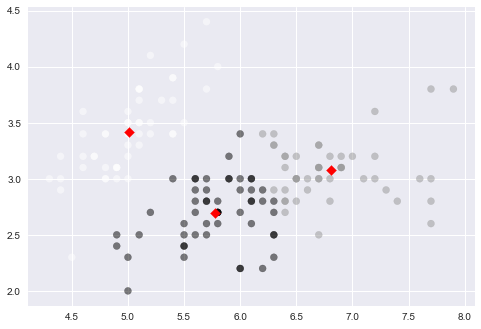

In [18]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [20]:
ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

predict   0   1   2
labels             
0        50   0   0
1         0  12  38
2         0  35  15


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)

ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

predict   0   1   2
labels             
0         0   1  49
1        13  36   1
2        31  19   0


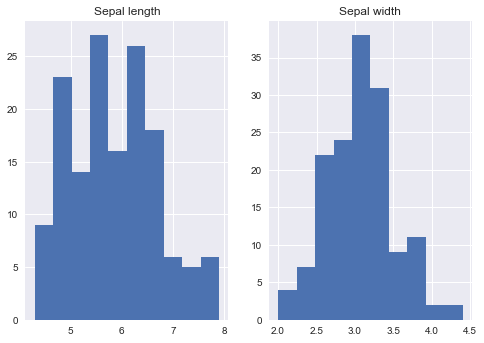

In [26]:
plt.subplot(1,2,1)
plt.hist(data['Sepal length'])
plt.title('Sepal length')
plt.subplot(1,2,2)
plt.hist(data['Sepal width'])
plt.title('Sepal width')
plt.show()

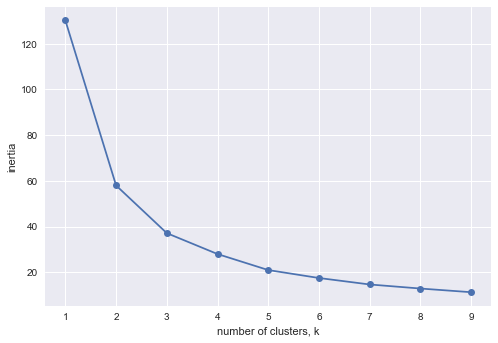

In [28]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()